SVM and Neural Network approach
--
____
First we will create test and train datasets for further processing.
For start our data was stored in the following manner:
- DevanagariHandwrittenCharacterDataset
    - Test
        - digit_0
        - digit_1
        - ...
        - digit_9
    - Train
        - digit_0
        - digit_1
        - ...
        - digit_9

Every subfolder contains images of the corresponding digit and there is 1700 images of each digit in the train dataset and 3000 images of each digit in the test dataset so the ratio of images is 85% for the train dataset and 15% for the test dataset.

In [4]:
import os
import cv2 as cv
import numpy as np

X_train = []
y_train = []
X_test = []
y_test = []

# Traverse DevanagariHandwrittenCharacterDataset Test and Tran folders to create a dataset for learning
current_digit = 0
for i in range(10):
    for root, dirs, files in os.walk(f'DevanagariHandwrittenCharacterDataset/Test/digit_{i}'):
        print('Reading images from:', root)
        for file in files:
            # Read the image,convert it to grayscale and flatten it
            img = cv.cvtColor(cv.imread(os.path.join(root, file)), cv.COLOR_RGB2GRAY).flatten()
            # Add the image pixels to the test dataset
            X_test.append(img)
            y_test.append(current_digit)

    for root, dirs, files in os.walk(f'DevanagariHandwrittenCharacterDataset/Train/digit_{i}'):
        print('Reading images from:', root)
        for file in files:
            # Read the image,convert it to grayscale and flatten it
            img = cv.cvtColor(cv.imread(os.path.join(root, file)), cv.COLOR_RGB2GRAY).flatten()
            # Add the image pixels to the test dataset
            X_train.append(img)
            y_train.append(current_digit)
    current_digit += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Get the indices of the train dataset
indices = np.arange(X_train.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Shuffle the dataset using the shuffled indices
X_train = X_train[indices]
y_train = y_train[indices]

# Get the indices of the test dataset
indices = np.arange(X_test.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Shuffle the dataset using the shuffled indices
X_test = X_test[indices]
y_test = y_test[indices]

print('Final shapes of the datasets:')
print('X_train:', X_train.shape, '\ny_train:', y_train.shape)
print('X_test:', X_test.shape, '\ny_test:', y_test.shape)

Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_0
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_0
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_1
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_1
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_2
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_2
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_3
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_3
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_4
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_4
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_5
Reading images from: DevanagariHandwrittenCharacterDataset/Train/digit_5
Reading images from: DevanagariHandwrittenCharacterDataset/Test/digit_6
Reading images from: DevanagariHandwrittenCharacterDataset

We are traversing through the dataset folders and reading the images, converting them to grayscale and flattening them so every row in the dataset represents all 1024 pixels of the image (32x32) treated as individual features after every image added to the dataset we are also adding the corresponding label to the label dataset.
Then we are doing the same for the test dataset images.
Finally, we are shuffling the datasets and printing their shapes to check if everything is in order.

As we have our datasets ready we can start with the SVM approach

In [5]:
from sklearn.svm import SVC

# Create basic SVM model
svm_model = SVC(kernel='linear')
# Fit the model
svm_model.fit(X_train, y_train)
# Get the accuracy of the model
accuracy = svm_model.score(X_test, y_test)
print('Accuracy of the SVM model:', accuracy)

Accuracy of the SVM model: 0.9563333333333334


First we used SVM model with linear kernel from the sklearn library. The accuracy can be seen above. Let's also see other metrics. To do this let's define a function that will print some predictions on actual test set, the confusion matrix and f1 score.

10 random predictions on the test set:


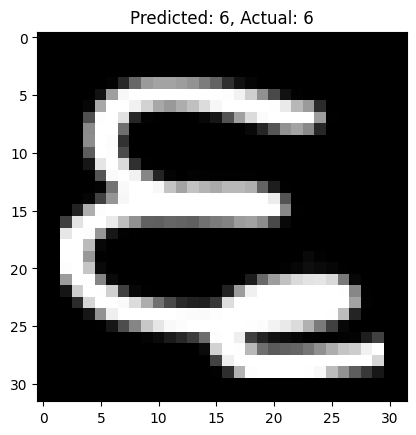

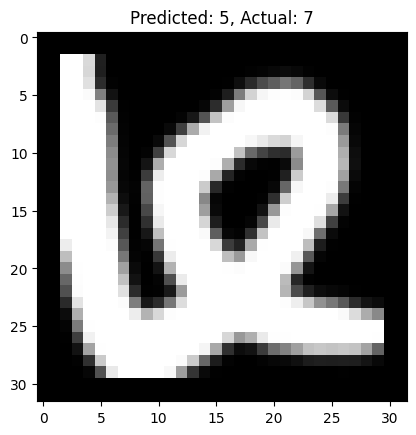

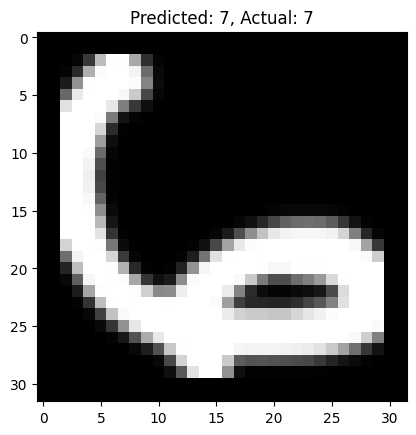

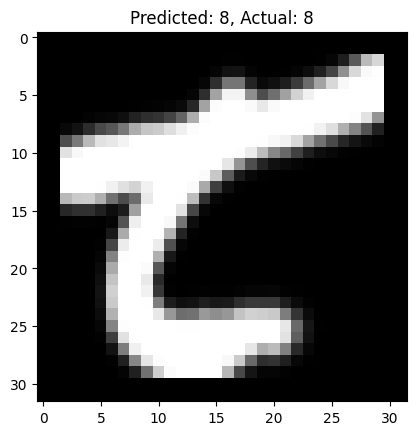

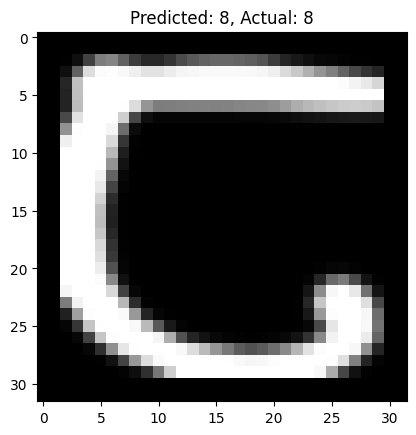

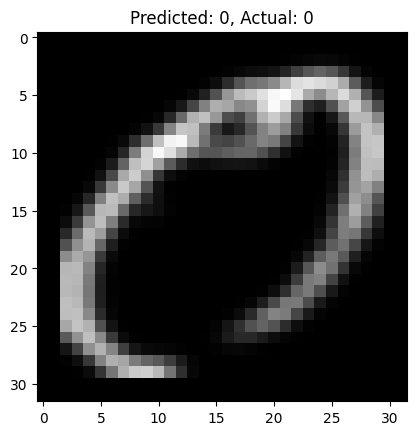

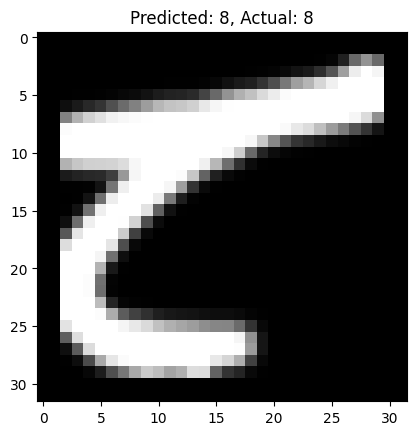

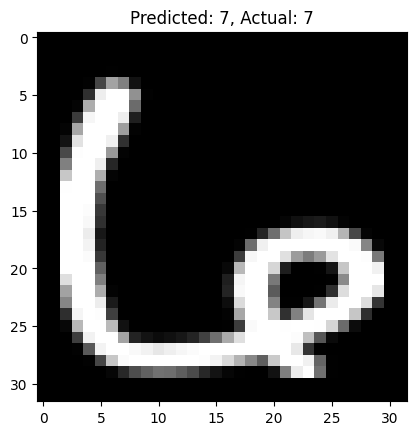

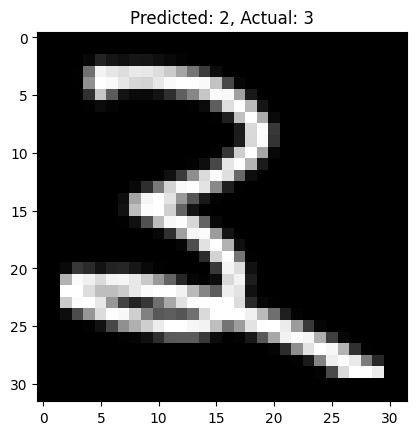

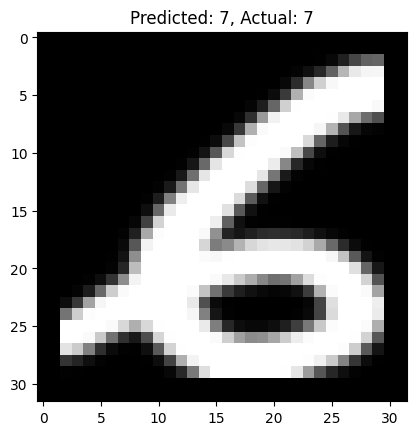

Confusion matrix (X - predicted, Y - actual):
[[300   0   0   0   0   0   0   0   0   0]
 [  0 296   0   0   0   0   1   1   0   2]
 [  1   2 269  25   1   1   0   1   0   0]
 [  0   0  43 252   0   2   1   2   0   0]
 [  0   0   0   1 296   2   1   0   0   0]
 [  0   0   4   2   5 286   2   1   0   0]
 [  0   1   2   2   0   0 291   3   1   0]
 [  6   0   1   0   1   3   2 287   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  4   0   1   0   0   0   2   0   1 292]]
F1 score: 0.9563301346657066


In [23]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

def show_other_metrics(model, test_features, test_labels, is_tf_model=True):
    # Get the predictions
    predictions = model.predict(test_features)
    if is_tf_model:
        predictions = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    print('10 random predictions on the test set:')
    for i in range(10):
        n = np.random.randint(0, test_features.shape[0])
        plt.imshow(test_features[n].reshape(32, 32), cmap='gray')
        plt.title(f'Predicted: {predictions[n]}, Actual: {y_test[n]}')
        plt.show()
    print('Confusion matrix (X - predicted, Y - actual):')
    print(confusion_matrix(test_labels, predictions))
    print('F1 score:', f1_score(test_labels, predictions, average='weighted'))

show_other_metrics(svm_model, X_test, y_test, False)

After the basic model we tried the SVM with standard scaler and rbf kernel

Accuracy of the SVM model with a pipeline: 0.9916666666666667
10 random predictions on the test set:


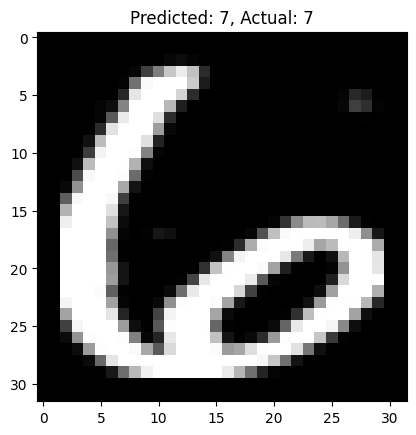

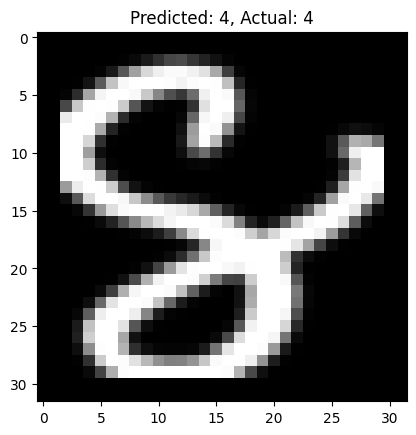

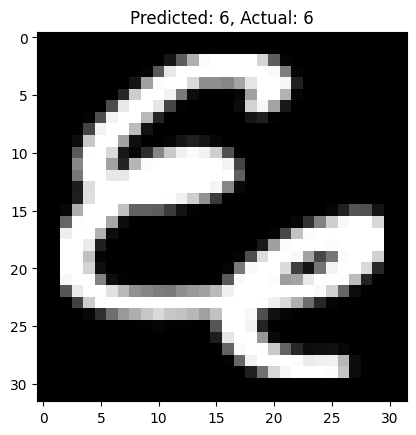

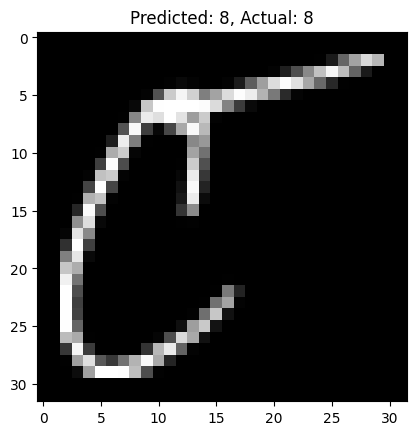

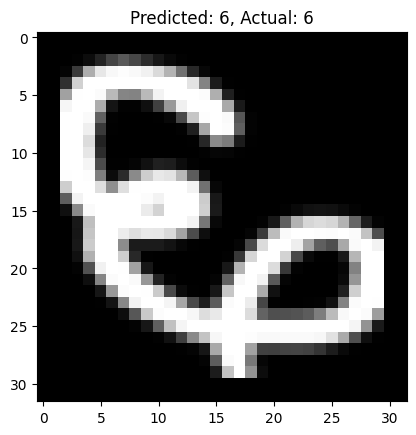

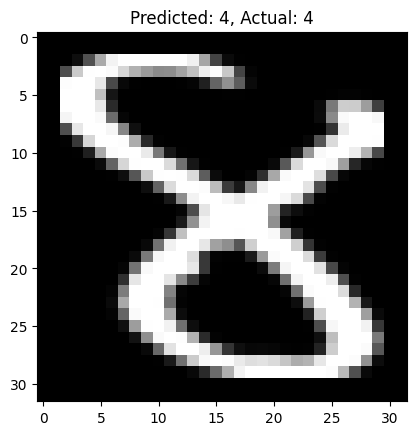

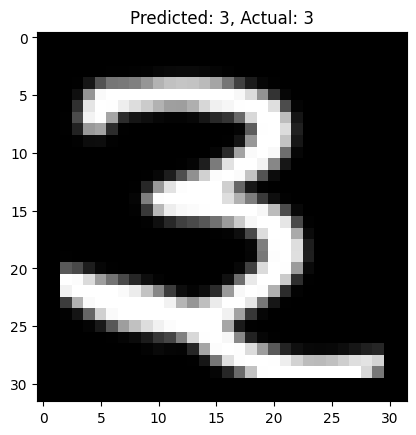

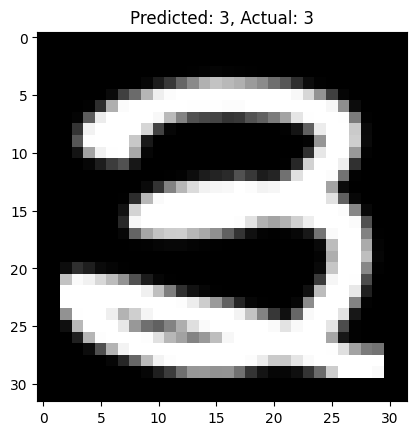

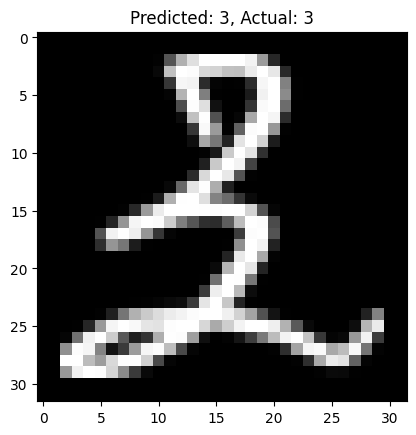

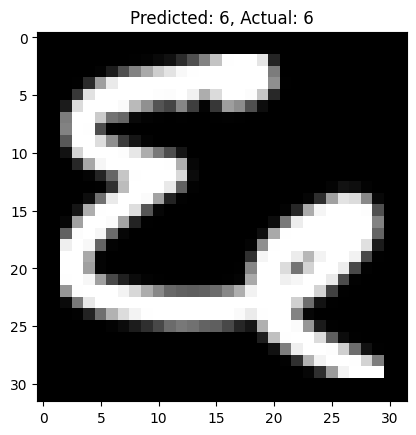

Confusion matrix (X - predicted, Y - actual):
[[299   0   0   0   0   0   0   1   0   0]
 [  0 299   0   0   0   0   0   0   1   0]
 [  0   0 295   3   0   1   0   0   0   1]
 [  0   0   7 293   0   0   0   0   0   0]
 [  0   0   0   0 299   1   0   0   0   0]
 [  0   0   2   0   1 296   1   0   0   0]
 [  0   1   0   0   0   0 298   1   0   0]
 [  0   0   0   0   0   2   0 298   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   1   0   0   0   1   0   0 298]]
F1 score: 0.9916753064908953


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create SVM model with StandardScaler and other kernel
svm_pipeline_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
# Fit the model
svm_pipeline_model.fit(X_train, y_train)
# Get the accuracy of the model
accuracy = svm_pipeline_model.score(X_test, y_test)
print('Accuracy of the SVM model with a pipeline:', accuracy)

show_other_metrics(svm_pipeline_model, X_test, y_test, False)

The accuracy and f1 score are better with the pipeline model by approximately 3.5%

___

After SVM we tried the Neural Network approach

Epoch 1/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 22.3828 - sparse_categorical_accuracy: 0.7906 - val_loss: 1.8774 - val_sparse_categorical_accuracy: 0.9247
Epoch 2/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7775 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.9936 - val_sparse_categorical_accuracy: 0.9476
Epoch 3/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6226 - sparse_categorical_accuracy: 0.9620 - val_loss: 1.2192 - val_sparse_categorical_accuracy: 0.9515
Epoch 4/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.6820 - sparse_categorical_accuracy: 0.9693 - val_loss: 0.9831 - val_sparse_categorical_accuracy: 0.9556
Epoch 5/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4546 - sparse_categorical_accuracy: 0.9718 - val_loss: 0.6610 - val_sparse_categorical_accuracy: 0.9615
Epoch 6/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9800 - val_loss: 1.1853 - val_sparse_categorical_accuracy: 0.9544
94

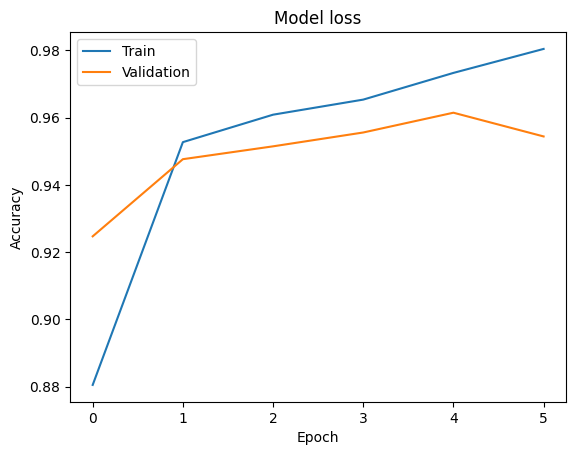

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
10 random predictions on the test set:


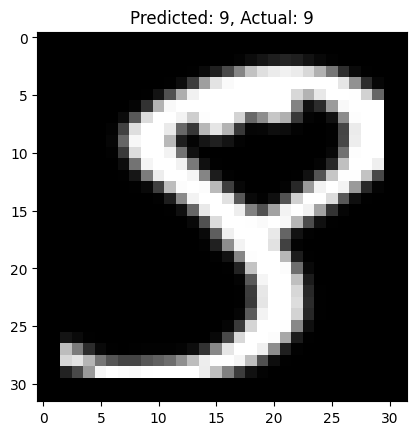

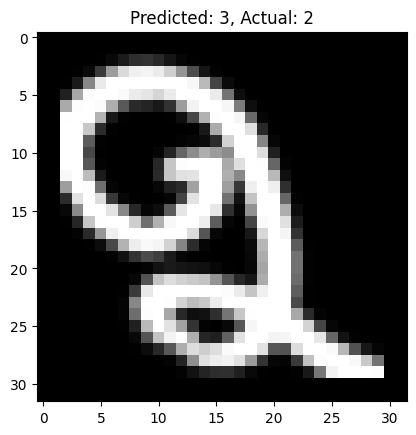

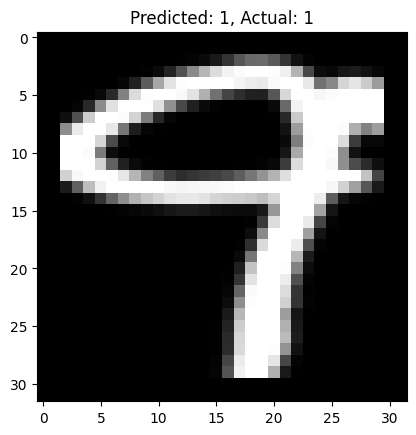

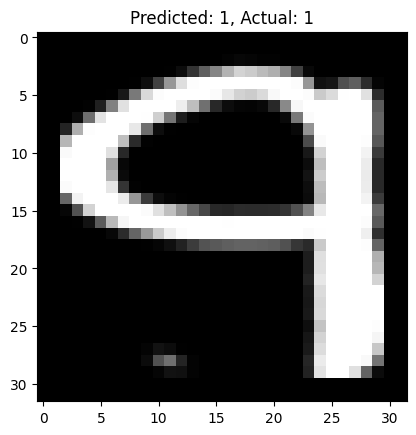

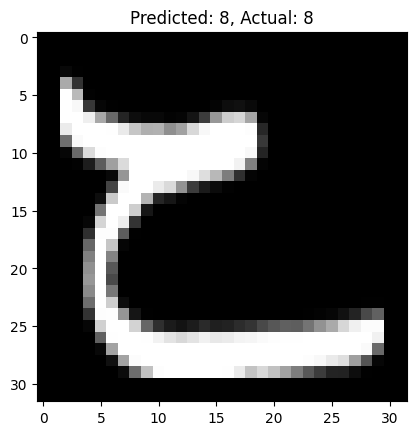

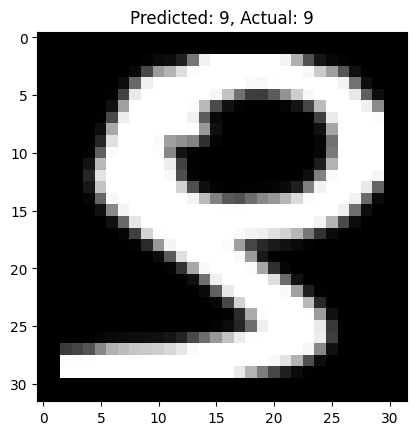

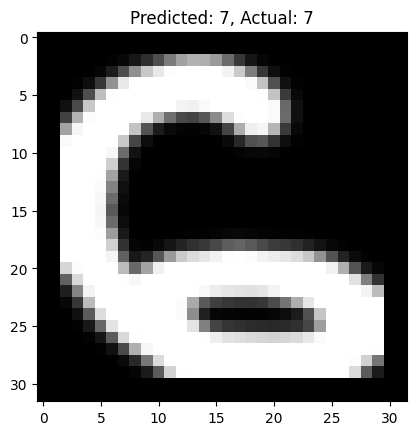

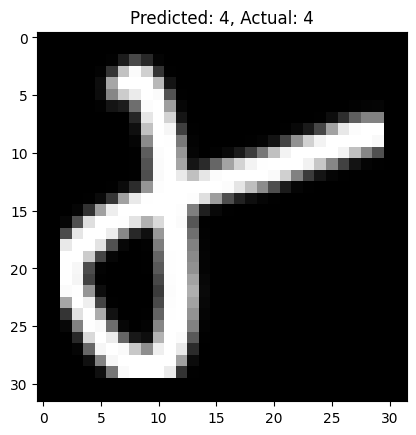

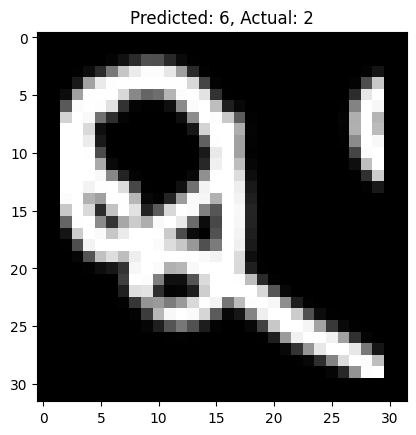

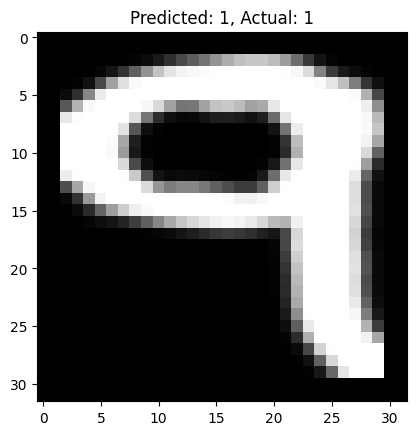

Confusion matrix (X - predicted, Y - actual):
[[298   0   0   0   0   0   1   1   0   0]
 [  2 289   0   0   0   0   7   0   0   2]
 [  2   1 264  16   1   2  12   1   0   1]
 [  0   1   7 277   0   7   6   1   0   1]
 [  0   0   0   0 290   2   8   0   0   0]
 [  0   0   0   2   1 292   3   0   2   0]
 [  0   0   0   0   0   0 300   0   0   0]
 [  6   0   0   0   1   1   9 283   0   0]
 [  1   0   0   0   2   0   1   0 296   0]
 [  4   0   0   0   0   0   8   1   0 287]]
F1 score: 0.9589191367451537


In [29]:
from tensorflow.keras import layers, models, optimizers, losses, metrics

nn_model_basic = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model_basic.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                       metrics=['sparse_categorical_accuracy'])
history = nn_model_basic.fit(X_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

print('Accuracy of the basic neural network model:', nn_model_basic.evaluate(X_test, y_test)[1])

def show_history(history):
    # Show history of the model
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model loss')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
show_history(history)
show_other_metrics(nn_model_basic, X_test, y_test)

Model was basic neural network with 2 hidden layers and 512 and 256 neurons respectively. We were learning for 6 epochs witch batches of size 32 and with validation on set of size 0.2 of training set. The accuracy is approximately 96% and the f1 score is 0.96.

Let's try to improve the model by adding dropout layers. Every dropout layer will have 0.2 dropout rate.

C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.7906 - sparse_categorical_accuracy: 0.9636 - val_loss: 1.1974 - val_sparse_categorical_accuracy: 0.9571
Epoch 2/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4624 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.8795 - val_sparse_categorical_accuracy: 0.9556
Epoch 3/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.9757 - val_loss: 0.5993 - val_sparse_categorical_accuracy: 0.9694
Epoch 4/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2268 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.4262 - val_sparse_categorical_accuracy: 0.9724
Epoch 5/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.4348 - val_sparse_categorical_accuracy: 0.9732
Epoch 6/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9834 - val_loss: 0.8891 - val_sparse_categorical_accuracy: 0.9515
94/9

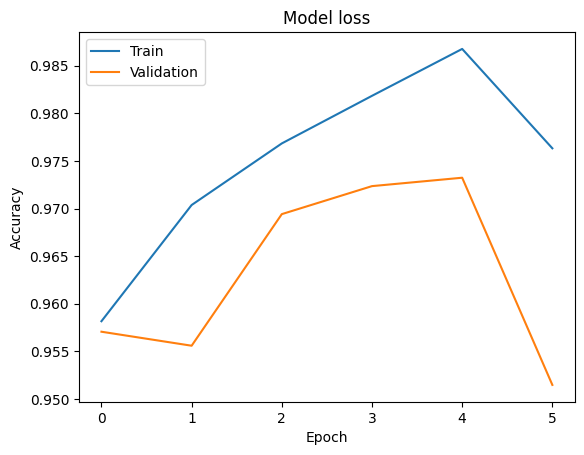

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10 random predictions on the test set:


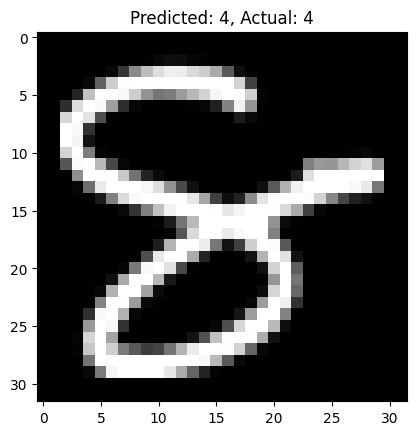

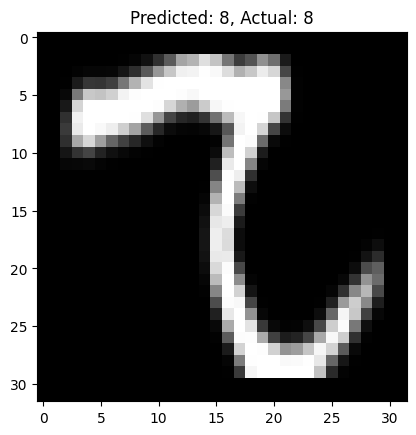

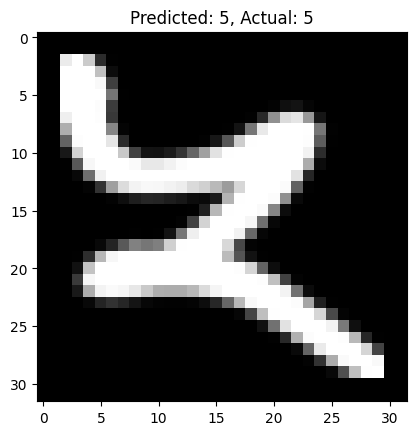

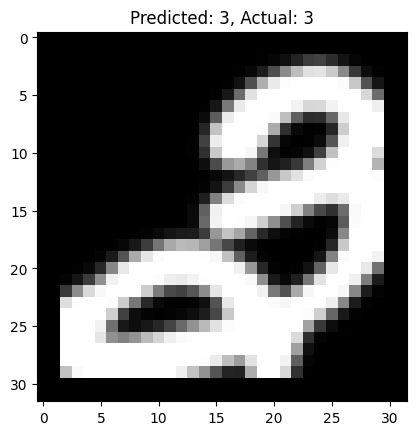

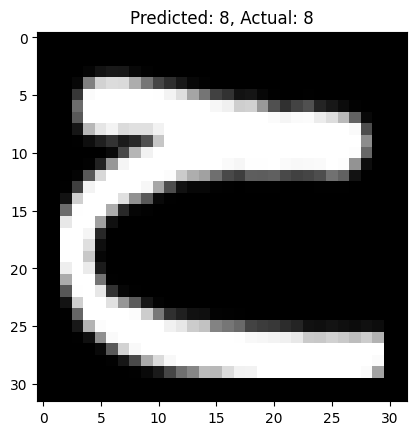

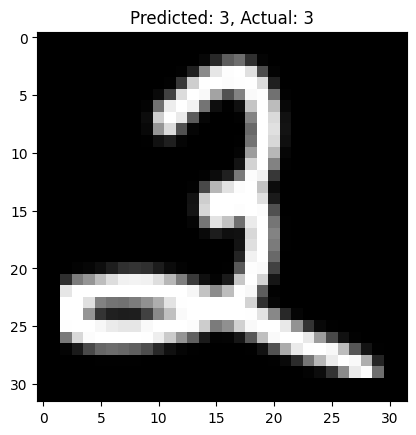

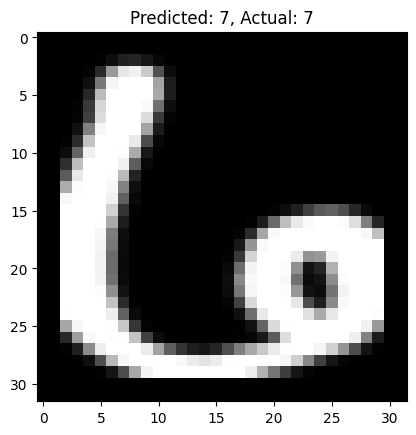

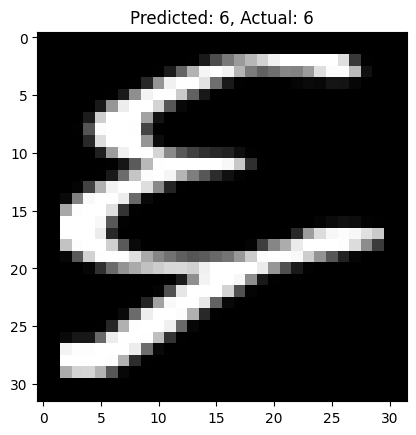

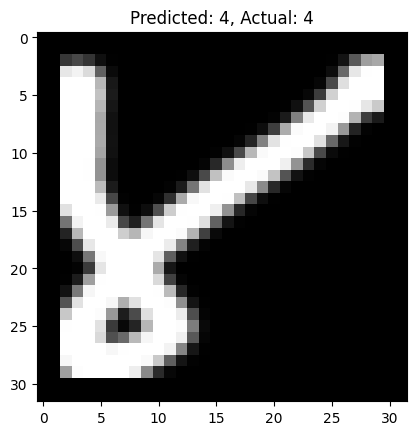

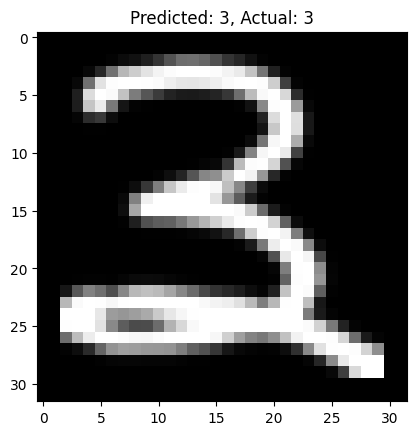

Confusion matrix (X - predicted, Y - actual):
[[298   0   0   0   0   0   0   2   0   0]
 [  0 293   0   0   0   0   1   5   1   0]
 [  2   3 276   8   0   3   6   0   0   2]
 [  1   2  15 262   2   4   9   3   0   2]
 [  0   1   0   2 289   3   0   5   0   0]
 [  0   0   3   1   5 289   0   1   1   0]
 [  0   1   1   0   0   2 290   6   0   0]
 [  3   0   0   0   1   2   0 294   0   0]
 [  0   0   0   0   0   0   0   0 299   1]
 [  0   0   0   0   0   0   0   1   2 297]]
F1 score: 0.9620865904639704


In [30]:
nn_model_dropout = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(1024,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model_basic.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                       metrics=[metrics.sparse_categorical_accuracy])
history = nn_model_basic.fit(X_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

print('Accuracy of the neural network model with dropout:', nn_model_basic.evaluate(X_test, y_test)[1])

show_history(history)
show_other_metrics(nn_model_basic, X_test, y_test)

The accuracy of the model with dropout layers is approximately 97% and the f1 score is 0.97. The model is slightly better than the basic model. Even with the effect of overfitting the model cause we can see on the history plot that the validation and training accuracy drops on the last epoch

Let's try to normalize the input data and see if it will improve the model. After the normalization layer we will add batch normalization layers after every hidden layer. The dropout layers stay the same and the learning parameters so the number of epochs, batch size and validation set are the same as in the previous model.

Epoch 1/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.4647 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.0875 - val_sparse_categorical_accuracy: 0.9729
Epoch 2/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9740 - val_loss: 0.0658 - val_sparse_categorical_accuracy: 0.9785
Epoch 3/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9818
Epoch 4/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0500 - val_sparse_categorical_accuracy: 0.9850
Epoch 5/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0564 - val_sparse_categorical_accuracy: 0.9826
Epoch 6/6
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0534 - val_sparse_categorical_accuracy: 0.9824
94/9

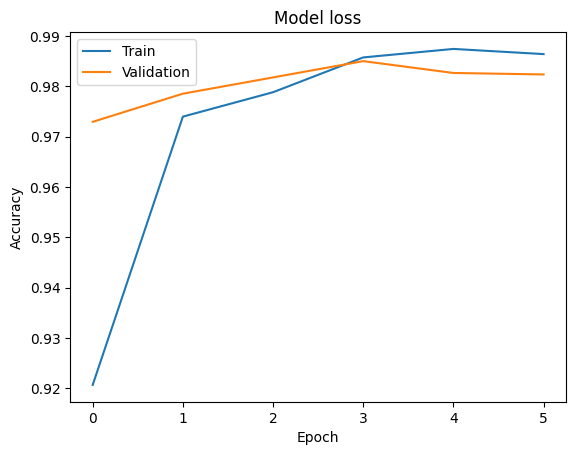

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
10 random predictions on the test set:


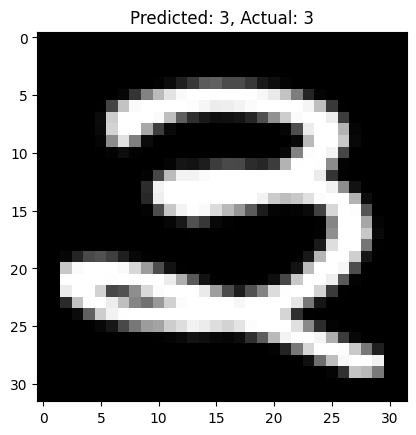

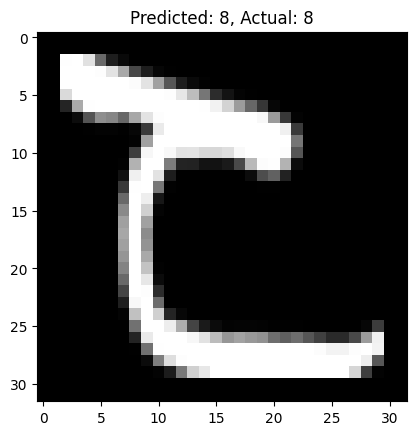

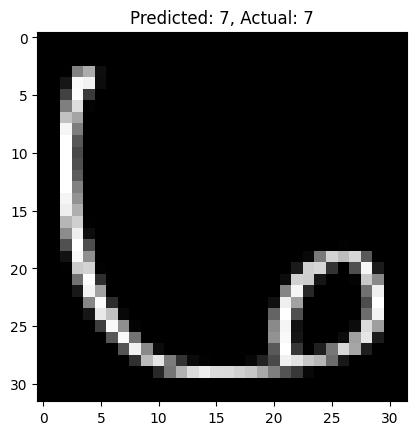

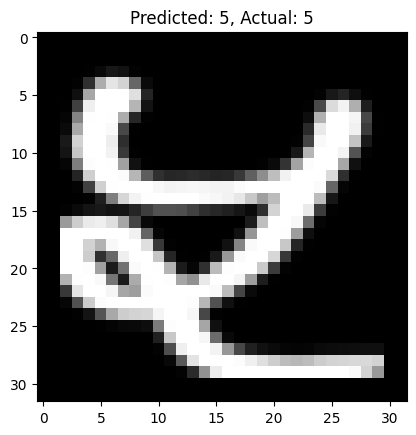

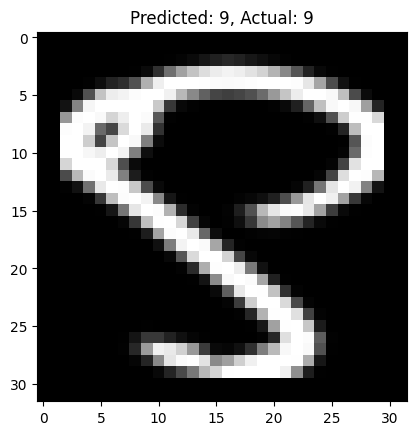

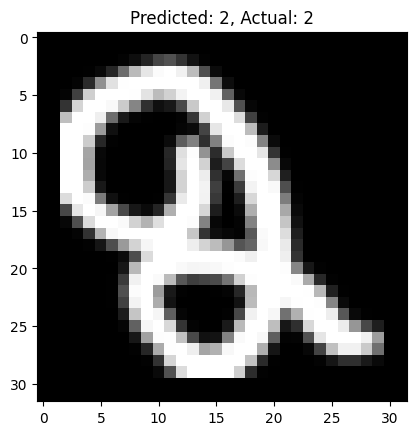

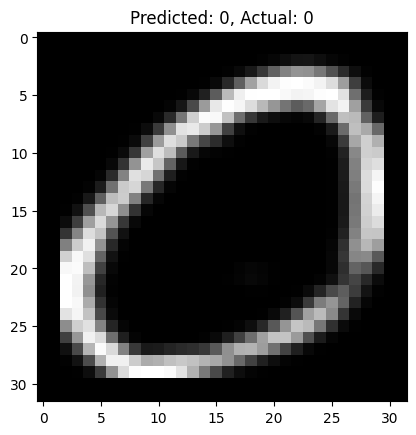

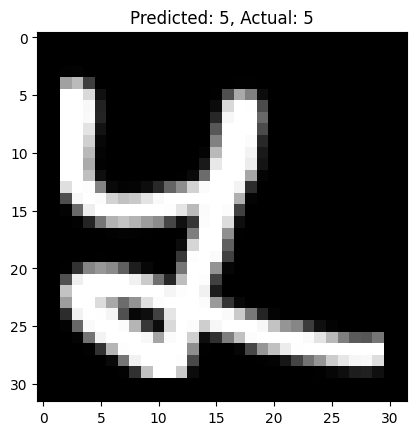

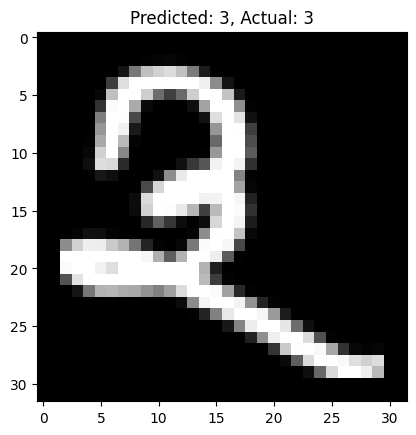

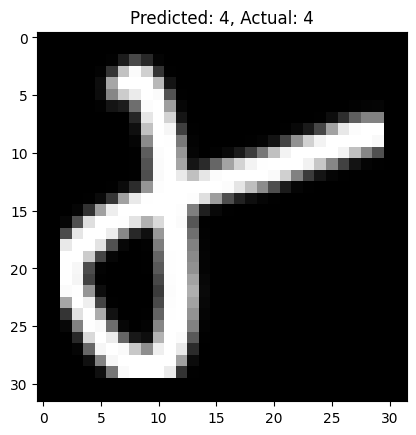

Confusion matrix (X - predicted, Y - actual):
[[299   0   0   0   0   0   0   0   0   1]
 [  0 297   0   0   0   0   0   1   0   2]
 [  0   0 279  17   0   2   1   0   0   1]
 [  0   0   1 298   0   1   0   0   0   0]
 [  0   0   0   0 298   1   0   0   0   1]
 [  0   0   1   1   1 294   2   0   1   0]
 [  0   0   2   0   0   1 295   1   0   1]
 [  1   0   0   0   1   1   0 297   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   1   0   0   0   0   0   1 298]]
F1 score: 0.9849694329879907


In [31]:
# Create and adapt the normalization layer
normalizer = layers.Normalization()
normalizer.adapt(X_train)

nn_model_norm = models.Sequential([
    layers.Input(shape=(1024,)),
    normalizer,
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

nn_model_norm.compile(optimizer=optimizers.Adam(), loss=losses.sparse_categorical_crossentropy,
                      metrics=[metrics.sparse_categorical_accuracy])

history = nn_model_norm.fit(X_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

print('Accuracy of the neural network model with normalization and batch normalization:', nn_model_norm.evaluate(X_test, y_test)[1])

show_history(history)
show_other_metrics(nn_model_norm, X_test, y_test)

The accuracy of the model with normalization and batch normalization layers is approximately 98% and the f1 score is 0.98. The model is slightly better than the model with dropout layers, so it's even better than basic model we tried.